In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.preprocessing
import sklearn.metrics
import sklearn.linear_model


In [18]:
df = pd.read_parquet('data/trab_rays.parquet')
df

,depth,ns_angle,vs_angle,ap_translation,ml_translation,ray_dist,name,ns_angle_orig,vs_angle_orig
0,-5,-10,-10,-5,-5,39.094397,S202501L_trab,130.752263,49.570700
1,-5,-10,-10,-5,-4,38.368834,S202501L_trab,130.752263,49.570700
2,-5,-10,-10,-5,-3,37.698466,S202501L_trab,130.752263,49.570700
3,-5,-10,-10,-5,-2,37.002025,S202501L_trab,130.752263,49.570700
4,-5,-10,-10,-5,-1,36.318150,S202501L_trab,130.752263,49.570700
...,...,...,...,...,...,...,...,...,...
586966,5,10,10,5,1,30.992991,171263R_trab,128.063086,33.544032
586967,5,10,10,5,2,30.719992,171263R_trab,128.063086,33.544032
586968,5,10,10,5,3,30.456661,171263R_trab,128.063086,33.544032
586969,5,10,10,5,4,30.131276,171263R_trab,128.063086,33.544032


In [25]:
# split
features = ['depth','ns_angle','vs_angle','ap_translation','ml_translation']
features = ['ns_angle']
X = df[features].values
y = df[['ray_dist']].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # scale
# scaler = sklearn.preprocessing.MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [26]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

# metrics for regression
print(f"r2: {sklearn.metrics.r2_score(y_test, y_pred)}")
print(f"mse: {sklearn.metrics.mean_squared_error(y_test, y_pred)}")
print(f"mae: {sklearn.metrics.mean_absolute_error(y_test, y_pred)}")
print(f"explained variance: {sklearn.metrics.explained_variance_score(y_test, y_pred)}")

# print out the coefficient
print(f"coefficients: {model.coef_}")


r2: 0.12053807276449147
mse: 30.22953755707617
mae: 4.4011676398038695
explained variance: 0.12053810097294293
coefficients: [-0.33675887]


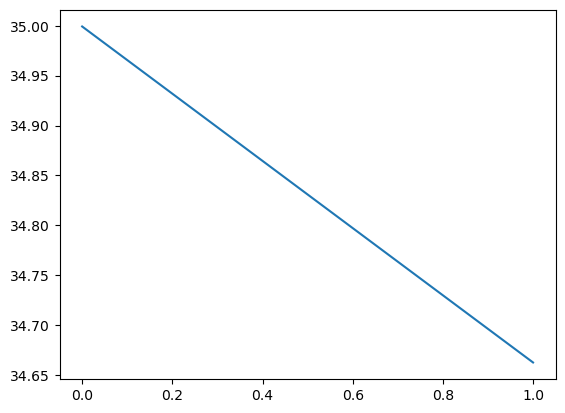

In [30]:
intercept = model.intercept_
coefficient = model.coef_
interval = np.linspace(0,1,100)
f = intercept + coefficient * interval
plt.plot(interval, f)
